## Analysing neighbourhood around hydrophobic, co-insertable protrusions

This notebook contains all the code needed to analysis of hydrophobic, co-insertable protrusions (found by 01 - basic protrusion tables). 
<br>
<br>

### 1) Imports & global stuff

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

from tqdm import tqdm

<br>
<br>

### 2) Importing data & prepare data tables

In [2]:
# Import basic protrusion data
periph_data = pd.read_csv("../results_and_feature_datasets/periph_protrusion_data.csv", sep="\t", encoding="utf-8", index_col=0)
periph_data = periph_data.drop(columns=["idx"])

tm_data = pd.read_csv("../results_and_feature_datasets/tm_protrusion_data.csv", sep="\t", encoding="utf-8", index_col=0)
tm_data = tm_data.drop(columns=["idx"])

In [2]:
# Import neighbourhood data
periph_neighbourhood = pd.read_csv("../results_and_feature_datasets/periph_hydr_protrusion_neighbourhood.csv", sep="\t", encoding="utf-8", index_col=0)
tm_neighbourhood = pd.read_csv("../results_and_feature_datasets/tm_hydr_protrusion_neighbourhood.csv", sep="\t", encoding="utf-8", index_col=0)

In [4]:
# Subset co-insertables
periph_co_insertable = periph_data.query("is_co_insertable > 0")
tm_co_insertable = tm_data.query("is_co_insertable > 0")

In [5]:
# Subset neighbourhood of co-insertable, hydrophobic protrusions
periph_co_insertable_neighbourhood = periph_neighbourhood[periph_neighbourhood["parent_protrusion_idx"].isin(periph_co_insertable.index)]
tm_co_insertable_neighbourhood = tm_neighbourhood[tm_neighbourhood["parent_protrusion_idx"].isin(tm_co_insertable.index)]

In [6]:
# Adding additional dataset column
periph_co_insertable_neighbourhood = periph_co_insertable_neighbourhood.assign(dataset = "periph")
tm_co_insertable_neighbourhood = tm_co_insertable_neighbourhood.assign(dataset = "tm")

# Merge
co_insertable_neighbourhood = periph_co_insertable_neighbourhood.append(tm_co_insertable_neighbourhood)

<br>
<br>

### 3) Analysis

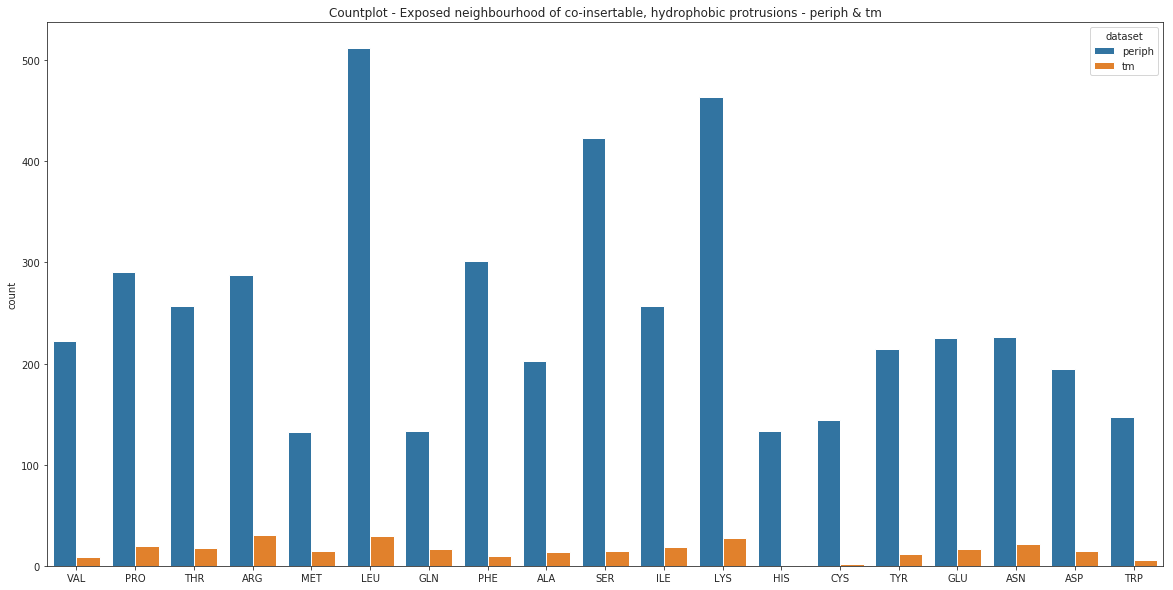

In [176]:
plt.figure(figsize=(20,10))
sns.set_style("ticks")
sns.countplot(x="residue_name", hue="dataset", data=co_insertable_neighbourhood.query("sasa_percentage >= 20"))
plt.title("Countplot - Exposed neighbourhood of co-insertable, hydrophobic protrusions - periph & tm")
plt.xlabel("")
plt.savefig("../tmp.png", dpi=300)
#plt.show()

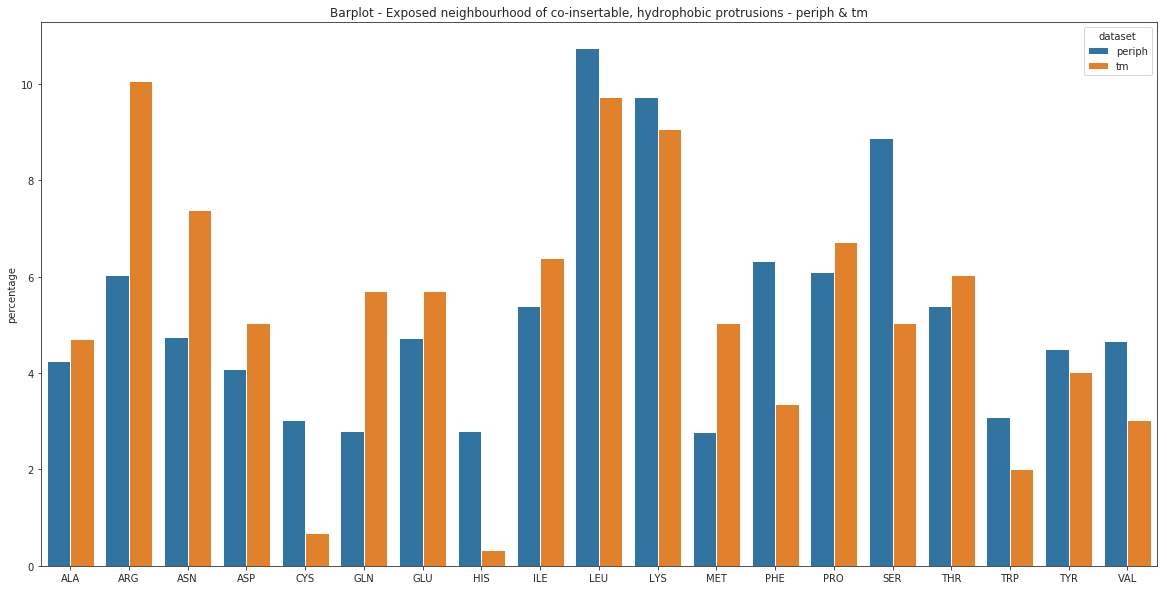

In [184]:
dd = co_insertable_neighbourhood.query("sasa_percentage >= 20").groupby(["dataset"])["residue_name"].value_counts(normalize=True) \
    .rename('percentage').mul(100).reset_index().sort_values(["residue_name", "dataset"])

plt.figure(figsize=(20,10))
sns.set_style("ticks")
sns.barplot(x="residue_name", y="percentage", hue="dataset", data=dd)
plt.title("Barplot - Exposed neighbourhood of co-insertable, hydrophobic protrusions - periph & tm")
plt.xlabel("")
plt.ylabel("percentage")
plt.savefig("../tmp2.png", dpi=300)

  dataset  count  percentage
0  periph      1    0.129187
1  periph      2    0.013158
2  periph      3    0.001196
3      tm      1    0.018868
4      tm      2    0.000000
5      tm      3    0.000000




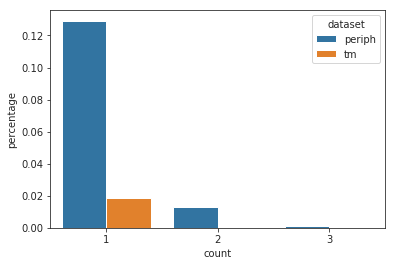

In [199]:
# Table for amino acid to investigate further at splitting up 
# the overall percentages against the amount of the amino acid in neighbourhodd
dd = co_insertable_neighbourhood.query("sasa_percentage >= 20").groupby(["dataset", "pdb", "parent_protrusion_idx"])["residue_name"].value_counts() \
    .unstack(fill_value=0).stack().rename("count").reset_index()

dd = dd.query("residue_name == 'HIS'").groupby(["dataset"])["count"].value_counts(normalize=True).unstack(fill_value=0).stack().rename("percentage") \
    .reset_index().query("count > 0").reset_index(drop=True)

print dd
print "\n"

sns.barplot(x="count", y="percentage", hue="dataset", data=dd)
plt.show()

In [210]:
print "hydrophobic protrusions: \t\t\t", len(periph_data.query("is_hydrophobic_protrusion > 0"))
print "hydrophobic & co-insertable protrussions: \t", len(periph_data.query("is_co_insertable > 0"))
print "percentage \t\t\t\t\t", (836.0/2992.0*100)

hydrophobic protrusions: 			2992
hydrophobic & co-insertable protrussions: 	836
percentage 					27.9411764706


In [211]:
print "hydrophobic protrusions: \t\t\t", len(tm_data.query("is_hydrophobic_protrusion > 0"))
print "hydrophobic & co-insertable protrussions: \t", len(tm_data.query("is_co_insertable > 0"))
print "percentage \t\t\t\t\t", (53.0/568.0*100)

hydrophobic protrusions: 			568
hydrophobic & co-insertable protrussions: 	53
percentage 					9.33098591549


<br>
<br>

### 4) Other stuff

In [9]:
periph_data.query("is_co_insertable > 0")

atom_name  atom_number chain_id  is_co_insertable  \
63            CB          557        A                 1   
66            CB          586        A                 1   
67            CB          594        A                 1   
287           CB          361        B                 1   
288           CB          369        B                 1   
3122          CB           75        A                 1   
3123          CB           94        A                 1   
3653          CB          150        A                 1   
3654          CB          158        A                 1   
4979          CB           79        A                 1   
4980          CB           87        A                 1   
6771          CB         4039        B                 1   
6772          CB         4047        B                 1   
8149          CB           17        A                 1   
8152          CB           70        A                 1   
8155          CB          126        A                 1   
8158          CB          181        A                 1   
8853          CB           64        A                 1   
8854          CB           83        A                 1   
10253         CB         1324        C                 1   
10255         CB         1339        C                 1   
11020         CB         1111        A                 1   
11023         CB         1133        A                 1   
11024         CB         1141        A                 1   
13210         CB        15364        F                 1   
13211         CB        15372        F                 1   
14291         CB          150        A                 1   
14292         CB          161        A                 1   
14544         CB          259        A                 1   
14545         CB          285        A                 1   
...          ...          ...      ...               ...   
225826        CB           29        A                 1   
225831        CB           79        A                 1   
226192        CB         3186        A                 1   
226194        CB         3202        A                 1   
226196        CB         3217        A                 1   
226815        CB         5096        B                 1   
226816        CB         5108        B                 1   
226914        CB         5941        B                 1   
226915        CB         5955        B                 1   
229091        CB          517        A                 1   
229093        CB          556        A                 1   
230382        CB          802        A                 1   
230383        CB          810        A                 1   
230506        CB          225      NaN                 1   
230509        CB          248      NaN                 1   
231022        CB         1016        A                 1   
231023        CB         1024        A                 1   
231025        CB         1042        A                 1   
231406        CB         1429        A                 1   
231407        CB         1437        A                 1   
232065        CB          162        A                 1   
232066        CB          186        A                 1   
232541        CB          123        A                 1   
232543        CB          151        A                 1   
232669        CB            5        A                 1   
232672        CB           31        A                 1   
232986        CB           30        A                 1   
232987        CB           38        A                 1   
234129        CB          218        A                 1   
234130        CB          226        A                 1   

        is_hydrophobic_protrusion  is_on_convhull  is_protrusion  neighbours  \
63                              1               1              1          15   
66                              1               1              1          20   
67                              1             

In [3]:
periph_neighbourhood

pdb residue_name  residue_number chain_id  is_protrusion  \
0      1kcm          VAL              69        A              0   
1      1kcm          PRO              70        A              1   
2      1kcm          THR              71        A              1   
3      1kcm          VAL              73        A              0   
4      1kcm          ARG              74        A              0   
5      1kcm          MET              75        A              1   
6      1kcm          LEU              76        A              1   
7      1kcm          GLN              66        A              0   
8      1kcm          VAL              69        A              0   
9      1kcm          PRO              70        A              1   
10     1kcm          THR              71        A              1   
11     1kcm          PHE              72        A              1   
12     1kcm          VAL              73        A              0   
13     1kcm          ARG              74        A              0   
14     1kcm          LEU              76        A              1   
15     1kcm          ALA              77        A              0   
16     1kcm          PRO              78        A              0   
17     1kcm          VAL              69        A              0   
18     1kcm          PRO              70        A              1   
19     1kcm          THR              71        A              1   
20     1kcm          PHE              72        A              1   
21     1kcm          VAL              73        A              0   
22     1kcm          ARG              74        A              0   
23     1kcm          MET              75        A              1   
24     1kcm          ALA              77        A              0   
25     1kcm          PRO              78        A              0   
26     1kcm          ALA              81        A              0   
27     1kcm          LYS             202        A              0   
28     1kcm          TRP             203        A              0   
29     1kcm          LEU             206        A              0   
...     ...          ...             ...      ...            ...   
23413  3d34          ARG              38        A              1   
23414  3d34          PRO              39        A              0   
23415  3d34          PRO              40        A              0   
23416  3d34          ALA              41        A              0   
23417  3d34          TYR              34        A              0   
23418  3d34          PRO              35        A              0   
23419  3d34          LEU              36        A              1   
23420  3d34          ARG              38        A              1   
23421  3d34          PRO              39        A              0   
23422  3d34          PRO              40        A              0   
23423  3d34          ALA              41        A              0   
23424  3d34          SER             172        A              0   
23425  3d34          ASP              70        A              0   
23426  3d34          PHE              71        A              0   
23427  3d34          GLU              76        A              0   
23428  3d34          ALA              77        A              0   
23429  3d34          ALA              79        A              0   
23430  3d34          LEU              80        A              0   
23431  3d34          MET              81        A              0   
23432  3d34          LYS              82        A              0   
23433  3d34          GLU              83        A              0   
23434  3d34          THR             165        A              0   
23435  3d34          ASP             166        A              0   
23436  3d34          SER             167        A              0   
23437  3d34          PHE             176        A              0   
23438  3d34          ALA             177        A              0   
23439  3d34          THR             178        A              0

In [9]:
periph_neighbourhood

pdb residue_name  residue_number chain_id  is_protrusion  \
0      1kcm          VAL              69        A              0   
1      1kcm          PRO              70        A              1   
2      1kcm          THR              71        A              1   
3      1kcm          VAL              73        A              0   
4      1kcm          ARG              74        A              0   
5      1kcm          MET              75        A              1   
6      1kcm          LEU              76        A              1   
7      1kcm          GLN              66        A              0   
8      1kcm          VAL              69        A              0   
9      1kcm          PRO              70        A              1   
10     1kcm          THR              71        A              1   
11     1kcm          PHE              72        A              1   
12     1kcm          VAL              73        A              0   
13     1kcm          ARG              74        A              0   
14     1kcm          LEU              76        A              1   
15     1kcm          ALA              77        A              0   
16     1kcm          PRO              78        A              0   
17     1kcm          VAL              69        A              0   
18     1kcm          PRO              70        A              1   
19     1kcm          THR              71        A              1   
20     1kcm          PHE              72        A              1   
21     1kcm          VAL              73        A              0   
22     1kcm          ARG              74        A              0   
23     1kcm          MET              75        A              1   
24     1kcm          ALA              77        A              0   
25     1kcm          PRO              78        A              0   
26     1kcm          ALA              81        A              0   
27     1kcm          LYS             202        A              0   
28     1kcm          TRP             203        A              0   
29     1kcm          LEU             206        A              0   
...     ...          ...             ...      ...            ...   
23413  3d34          ARG              38        A              1   
23414  3d34          PRO              39        A              0   
23415  3d34          PRO              40        A              0   
23416  3d34          ALA              41        A              0   
23417  3d34          TYR              34        A              0   
23418  3d34          PRO              35        A              0   
23419  3d34          LEU              36        A              1   
23420  3d34          ARG              38        A              1   
23421  3d34          PRO              39        A              0   
23422  3d34          PRO              40        A              0   
23423  3d34          ALA              41        A              0   
23424  3d34          SER             172        A              0   
23425  3d34          ASP              70        A              0   
23426  3d34          PHE              71        A              0   
23427  3d34          GLU              76        A              0   
23428  3d34          ALA              77        A              0   
23429  3d34          ALA              79        A              0   
23430  3d34          LEU              80        A              0   
23431  3d34          MET              81        A              0   
23432  3d34          LYS              82        A              0   
23433  3d34          GLU              83        A              0   
23434  3d34          THR             165        A              0   
23435  3d34          ASP             166        A              0   
23436  3d34          SER             167        A              0   
23437  3d34          PHE             176        A              0   
23438  3d34          ALA             177        A              0   
23439  3d34          THR             178        A              0